# Reconstruction of Spatial P Image

In [1]:
%cd H:\GitHub\pytracer\

H:\GitHub\pytracer


In [2]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline
import numpy as np
from scripts.assemblies import shielded_assembly
from scripts.utils import nice_double_plot
import pytracer.geometry as geo
import pytracer.fission as fission
import pytracer.neutron_chain as nchain

In [3]:
assembly_solids = shielded_assembly()
assembly_flat = geo.flatten(assembly_solids)

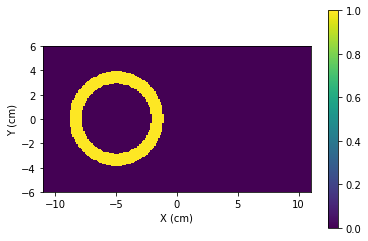

In [5]:
xs = np.linspace(-11, 11, 200)
ys = np.linspace(-6, 6, 200)
zs, extent = nchain.pfuncref_image(xs, ys, assembly_flat)

fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')
im = ax.imshow(zs, interpolation='none', extent=extent)
plt.colorbar(im)
ax.set_xlabel('X (cm)')
ax.set_ylabel('Y (cm)')
ax.set_aspect('equal')
plt.show()

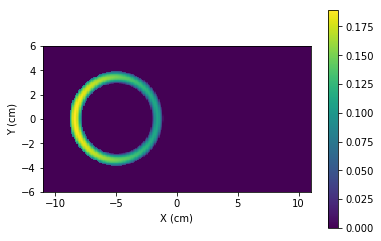

In [7]:
xs = np.linspace(-11, 11, 200)
ys = np.linspace(-6, 6, 200)
zs, extent = nchain.p_image(xs, ys, assembly_flat)

fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')
im = ax.imshow(zs, interpolation='none', extent=extent)
plt.colorbar(im)
ax.set_xlabel('X (cm)')
ax.set_ylabel('Y (cm)')
ax.set_aspect('equal')
plt.show()